In [29]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest, f_classif

In [127]:
# Load data 

data = pd.read_csv('C:/Users/dell/Desktop/3rd sem tiss/ml/data1.csv')
print(data.head())
print(data.columns)
data.isnull().sum()

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  ...  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296  ...   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242  ...   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242  ...   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222  ...   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222  ...   

   CHAS3      NOX3         RM3        AGE3        DIS3  RAD3      TAX3  \
0      0  0.155721  284.241359  277167.808   68.417929     1  25934336   
1      0  0.103162  264.732957  491169.069  122.548700     8  14172488   
2      0  0.103162  370.920057  228099.131  122.548700     8  14172488   
3      0  0.096072  342.706084   96071.912  222.787480    27  10941048   
4      0  0.096072  365.065966  159220.088  222.787480    27  10941048   

   PTRATIO3           B3      LSTAT3  
0  3581.577  62523502.21  123.505992  
1  5639.752  6252350

CRIM        0
ZN          0
INDUS       0
CHAS        0
NOX         0
RM          0
AGE         0
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT       0
<10         0
10-20       0
20-30       0
30-40       0
>40         0
class       0
MEDV        0
CRIM2       0
ZN2         0
INDUS2      0
CHAS2       0
NOX2        0
RM2         0
AGE2        0
DIS2        0
RAD2        0
TAX2        0
PTRATIO2    0
B2          0
LSTAT2      0
CRIM3       0
ZN3         0
INDUS3      0
CHAS3       0
NOX3        0
RM3         0
AGE3        0
DIS3        0
RAD3        0
TAX3        0
PTRATIO3    0
B3          0
LSTAT3      0
dtype: int64

In [126]:
# if column ends with 2 or 3 it means that they are respective degree 2 and 3 polynomials



In [61]:
# Dividing the classes for the classes of MEDV column, later to be used for classification

#already done on excel


<Figure size 1080x1368 with 0 Axes>

ValueError: num must be 1 <= num <= 36, not 37

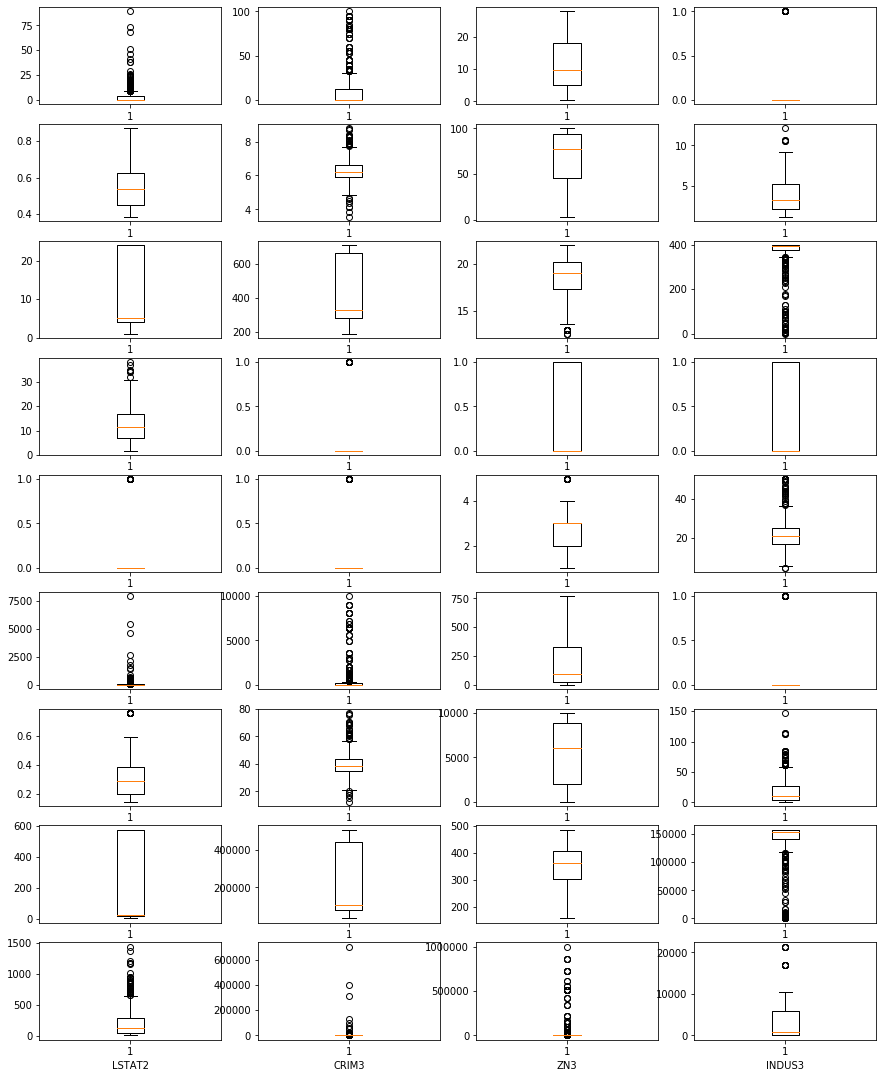

In [74]:
dt1 = data
feature = dt1.columns
plt.figure(figsize=(15,19))
for i in enumerate(feature):
    plt.subplot(9,4,i[0]+1)
    plt.boxplot(dt1[i[1]])
    
    plt.xlabel(i[1])

In [115]:
X = data.drop([ '<10', '10-20', '20-30', '30-40', '>40','class','MEDV'], axis =1)


y = data['class']
X.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'CRIM2', 'ZN2', 'INDUS2', 'CHAS2', 'NOX2',
       'RM2', 'AGE2', 'DIS2', 'RAD2', 'TAX2', 'PTRATIO2', 'B2', 'LSTAT2',
       'CRIM3', 'ZN3', 'INDUS3', 'CHAS3', 'NOX3', 'RM3', 'AGE3', 'DIS3',
       'RAD3', 'TAX3', 'PTRATIO3', 'B3', 'LSTAT3'],
      dtype='object')

In [116]:

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.20, random_state=3954,stratify = y)


In [117]:
# Fit one-vs-rest logistic regression classifier

lr_ovr = LogisticRegression(random_state=5,multi_class="ovr")
lr_ovr.fit(X_train, y_train)

print("OVR training accuracy:", lr_ovr.score(X_train, y_train))
print("OVR test accuracy    :", lr_ovr.score(X_test, y_test))

OVR training accuracy: 0.6311881188118812
OVR test accuracy    : 0.5392156862745098


C:\Users\dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regre

In [118]:
# Fit softmax classifier
lr_mn = LogisticRegression(random_state=5,multi_class="multinomial")
lr_mn.fit(X_train, y_train)

print("Softmax training accuracy:", lr_mn.score(X_train, y_train))
print("Softmax test accuracy    :", lr_mn.score(X_test, y_test))

Softmax training accuracy: 0.6212871287128713
Softmax test accuracy    : 0.5490196078431373


C:\Users\dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [119]:
# Feature selection

from sklearn.datasets import load_digits
from sklearn.feature_selection import SelectKBest, f_classif

bestfeature = SelectKBest(score_func = f_classif, k=3)
fit = bestfeature.fit(X,y)
print(fit.scores_)
print(fit.pvalues_)

#1,3,5,6,7,10,13,14,20,21,24,27,33,34,40

[ 51.99495863  27.81475393  55.91830428   4.32827813  52.79615376
 118.91926944  53.54845694  24.91234446  36.66254978  56.71490644
  45.65997616  27.45290592 189.90880493  16.14236619  19.54908014
  43.08812984   4.32827813  48.01660284 139.78727654  62.45279971
  15.02411811  37.45415027  54.53455197  46.66605542  27.24903626
 126.84648033   6.83446381  16.49767561  31.89433697   4.32827813
  41.67937717 156.54112129  66.2769375    8.89778395  37.73740078
  51.85855744  47.51912467  26.3602412   83.29463246]
[1.25206810e-36 7.07506742e-21 5.46496065e-39 1.88635942e-03
 4.08876543e-37 2.92846621e-71 1.43595408e-37 7.83014178e-19
 6.75917951e-27 1.83849949e-39 1.04016645e-32 1.26666038e-20
 6.21423353e-99 1.91820108e-12 5.79845691e-15 4.44949434e-31
 1.88635942e-03 3.49096643e-34 3.79465357e-80 8.22182234e-43
 1.31813150e-11 2.02460962e-27 3.66655872e-38 2.42877696e-33
 1.75955098e-20 1.01110187e-74 2.31685651e-05 1.04217057e-12
 1.08435404e-23 1.88635942e-03 3.56408274e-30 8.57336129e

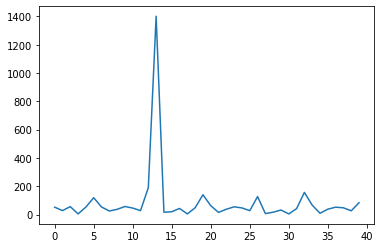

In [86]:
plt.plot(fit.scores_)

In [120]:
l = list(fit.scores_)
n = 15
 
l.sort()
print(l[-n:])


[51.85855743831107, 51.994958629672674, 52.79615376282784, 53.54845694476061, 54.53455196760145, 55.91830428253231, 56.71490644076846, 62.45279970560977, 66.27693750157702, 83.29463245575239, 118.91926944415665, 126.84648033494403, 139.7872765395925, 156.54112129330684, 189.90880493339105]


In [121]:
X1 = X[['CRIM','INDUS','NOX','RM','AGE','TAX','LSTAT','TAX3','RM2','AGE2', 'TAX2','LSTAT2','RM3','AGE3','LSTAT3']]

In [122]:
X1

,CRIM,INDUS,NOX,RM,AGE,TAX,LSTAT,TAX3,RM2,AGE2,TAX2,LSTAT2,RM3,AGE3,LSTAT3
0,0.00632,2.31,0.538,6.575,65.2,296,4.98,25934336,43.230625,4251.04,87616,24.8004,284.241359,277167.808,123.505992
1,0.02731,7.07,0.469,6.421,78.9,242,9.14,14172488,41.229241,6225.21,58564,83.5396,264.732957,491169.069,763.551944
2,0.02729,7.07,0.469,7.185,61.1,242,4.03,14172488,51.624225,3733.21,58564,16.2409,370.920057,228099.131,65.450827
3,0.03237,2.18,0.458,6.998,45.8,222,2.94,10941048,48.972004,2097.64,49284,8.6436,342.706084,96071.912,25.412184
4,0.06905,2.18,0.458,7.147,54.2,222,5.33,10941048,51.079609,2937.64,49284,28.4089,365.065966,159220.088,151.419437
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,11.93,0.573,6.593,69.1,273,9.67,20346417,43.467649,4774.81,74529,93.5089,286.582210,329939.371,904.231063
502,0.04527,11.93,0.573,6.120,76.7,273,9.08,20346417,37.454400,5882.89,74529,82.4464,229.220928,451217.663,748.613312
503,0.06076,11.93,0.573,6.976,91.0,273,5.64,20346417,48.664576,8281.00,74529,31.8096,339.484082,753571.000,179.406144
504,0.10959,11.93,0.573,6.794,89.3,273,6.48,20346417,46.158436,7974.49,74529,41.9904,313.600414,712121.957,272.097792


In [123]:
# for class 0

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X1, y, test_size=0.20, random_state=3954,stratify = y)


# Fit one-vs-rest logistic regression classifier
from sklearn.linear_model import LogisticRegression

lr_ovr = LogisticRegression(random_state=5,multi_class="ovr")
lr_ovr.fit(X_train, y_train)

print("OVR training accuracy:", lr_ovr.score(X_train, y_train))
print("OVR test accuracy    :", lr_ovr.score(X_test, y_test))

# Fit softmax classifier
lr_mn = LogisticRegression(random_state=5,multi_class="multinomial")
lr_mn.fit(X_train, y_train)

print("Softmax training accuracy:", lr_mn.score(X_train, y_train))
print("Softmax test accuracy    :", lr_mn.score(X_test, y_test))

OVR training accuracy: 0.594059405940594
OVR test accuracy    : 0.5784313725490197
Softmax training accuracy: 0.5742574257425742
Softmax test accuracy    : 0.5588235294117647


C:\Users\dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [124]:
predict=lr_ovr.predict(X_test)


from sklearn.metrics import confusion_matrix 

pd.DataFrame(confusion_matrix(y_test,predict))

#Checking for model accuracy score
from sklearn import metrics
print(metrics.accuracy_score(y_test, predict))

from sklearn.metrics import classification_report

print(classification_report(y_test,predict))

0.5784313725490197
              precision    recall  f1-score   support

           1       0.67      0.40      0.50         5
           2       0.54      0.70      0.61        37
           3       0.61      0.72      0.66        43
           4       0.00      0.00      0.00        11
           5       0.00      0.00      0.00         6

    accuracy                           0.58       102
   macro avg       0.36      0.36      0.35       102
weighted avg       0.49      0.58      0.52       102



C:\Users\dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
